# Clasificador de objetos simple
Clasificador simple de imagenes utilizando rutinas prediseñadas con las librerias torch, torchvision. <br>

Para este ejemplo se construira un clasificador de productos con imagenes recopiladas de google. Los objetos a clasificar pertenecer a las clases Doria, Jet o Tosh. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
CLASS_NAMES = ['Doria', 'Jet', 'Tosh']
DATA_SET_PATH = './DB'

config= {'modelName': 'NutresaResNet',
    'dataBase': 'Nutresa',
    'Classes': CLASS_NAMES,
    'Arq': 'ResNet18',
    'lastAct' : 'Softmax',
    'batchSize' : 32,
    'epochs' : 20,
    'loss' : 'CrossEntropy',
    'optim' : 'Adam',
    'lr' : 1e-4,
    'momentum': None,
    'l2' : 1e-4,
    'patience' : 5}

print('Training model %s in database %s ...' % (config['modelName'], DATA_SET_PATH.split('/')[-2]))
global best_acc1

Training model NutresaResNet in database . ...


### Incializacion de la arquitectura. 
Primero inicializamos un modelo de tipo ResNet18 con sus respectivos pesos de ImageNet, estos pesos pre-entrenados nos permitiran tener mejores resultados en terminos de metricas y tiempo de convergencia.

In [3]:
from models import ResNet18

model = ResNet18(len(CLASS_NAMES)) # Inicializamos el modelo 

for name, block in list(model.resnet18.named_children())[:-1]:  # Definimos solo la ultima capa fullyconnected como
    for parameter in list(block.parameters()):               # entrenable, todos los demas bloques son congelados
        parameter.requires_grad = False         

model.cuda()

# print all trainable layers names
for name, param in model.named_parameters():   # imprimimos el nombre de las capas a actualizar.
    if param.requires_grad:
        print(name, param.numel())

pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Total weigts: ', pytorch_total_params, '\n',
      'Trainable weigths: ', pytorch_trainable_params)   # obtenemos el numero total de parametros de entrenamiento



resnet18.fc.0.weight 1536
resnet18.fc.0.bias 3
Total weigts:  11178051 
 Trainable weigths:  1539


En este caso actualizaremos 1539 parametros de los 11M presentes en la arquitectura utilizando tecnicas de trasnfer learning a partir de los pesos de ImageNet altamente pertinentes para el tipo de datos en cuestion. 

train data: 12 val data: 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

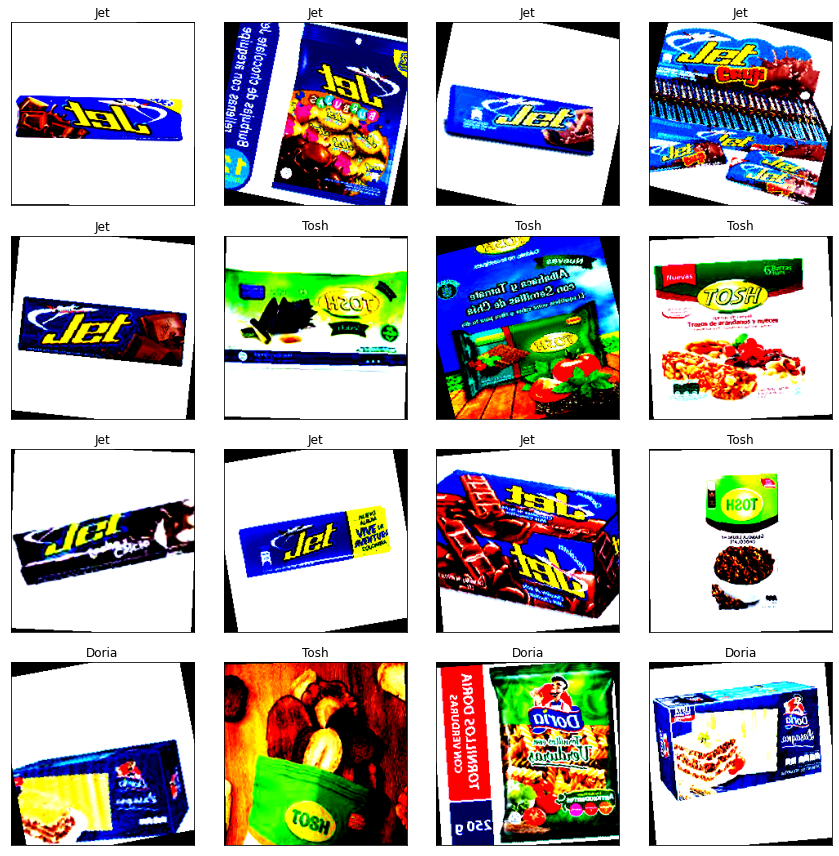

In [4]:
# Data loaders
from read_data import load_dataset_from_folder, get_transforms, plotImages

train_loader = load_dataset_from_folder(f'{DATA_SET_PATH}/Train',batch_size= config['batchSize'],
                        transform= get_transforms(augment= True))  # Aplicamos tecnicas de ImageAugmentation
                                                                        # implementadas en get_transforms


valid_loader = load_dataset_from_folder(f'{DATA_SET_PATH}/Test', batch_size= config['batchSize'],
                                       transform = get_transforms())  # Para validacion no se aplica aumentacion.

print('train data:', len(train_loader), 'val data:', len(valid_loader))
one_batch = next(iter(train_loader))
plotImages(one_batch, labels= CLASS_NAMES, title=config['modelName'], n_images=(4,4))

La imagen anterior corresponde a un bache de entrenamiento con las respectivas técnicas de ImageAugmentation aplicadas, en este caso se implementan variaciones de iluminación, traslación y rotación de la imagen así como la normalización y estandarización en los canales de ImageNet la cual es necesaria al utilizar transfer learning. 

### Entrenamiento del modelo

Epoch: 1 Loss 1.1517 (1.1457) Acc1 0.200 (0.277): 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
Validation: Loss 1.0943 (1.1043) Acc1 0.467 (0.341): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]
Epoch: 2 Loss 1.0761 (1.1200) Acc1 0.400 (0.282): 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
Validation: Loss 1.0339 (1.0664) Acc1 0.567 (0.444): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]
Epoch: 3 Loss 1.1358 (1.0921) Acc1 0.350 (0.371): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
Validation: Loss 1.0688 (1.0322) Acc1 0.467 (0.508): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]
Epoch: 4 Loss 1.0964 (1.0594) Acc1 0.350 (0.446): 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
Validation: Loss 1.0503 (1.0112) Acc1 0.467 (0.508): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]
Epoch: 5 Loss 1.0189 (1.0439) Acc1 0.500 (0.473): 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
Validation: Loss 1.0241 (0.9951) Acc1 0.467 (0.532): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]
Epoch: 6 Loss 1

Model train finished with best acc: 0.7936507936507936 at 20 epochs


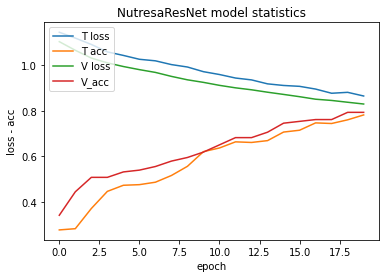

In [5]:
from train import fit
best_acc, epoch = fit(model,config['epochs'], train_loader, valid_loader, config=config)
print(f'Model train finished with best acc: {best_acc} at {epoch} epochs')

Entrenamos el modelo durante 20 épocas y visualizamos la curva de optimización donde podemos determinar bajos niveles de sobre entrenamiento y resultados del 80% de precisión.

100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

Confusion matrix, without normalization
[[ 7  4 16]
 [ 0 30  6]
 [ 0  0 63]]


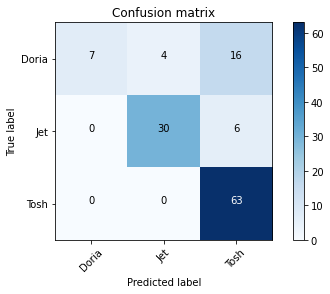

              precision    recall  f1-score   support

       Doria       1.00      0.26      0.41        27
         Jet       0.88      0.83      0.86        36
        Tosh       0.74      1.00      0.85        63

    accuracy                           0.79       126
   macro avg       0.87      0.70      0.71       126
weighted avg       0.84      0.79      0.76       126



In [6]:
from test import test, plot_confusion_matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

test_loader = load_dataset_from_folder(f'{DATA_SET_PATH}/Test', batch_size=config['batchSize'], 
                                      transform = get_transforms())
targets, predictions = test(test_loader, model)
predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(targets, predictions)
plot_confusion_matrix(cm, classes=CLASS_NAMES)

clf_report = classification_report(targets, predictions, target_names=CLASS_NAMES)
print(clf_report)

Finalmente, evaluamos los resultados con matrices de confusion y reportes de clasificacion que nos muestran un muy buen desempeño en el set de prueba. 